ESPECIALIZAÇÃO EM INTELIGÊNCIA ARTIFICIAL

Lista de Exercícios 3

Análise e Previsão de Séries Temporais

**Roteiro:**
1. Escolher 3 modelos, cada um pertencente a um dos grupos abaixo:

A. Um modelo simples

B. Um modelo de suavização exponencial

C. Um modelo ARIMA

2. Separar a base de dados em treinamento e teste, na proporção 80% para 20%.
3. Aplicar cada método de previsão aos dados, usando validação cruzada.
4. Medir o desempenho de cada modelo a partir de 3 métricas: MAE, RMSE e SMAPE.
5. Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos de
cada base de dados.

In [31]:
pip install pmdarima

     -------------------------------------- 614.7/614.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 124.2/124.2 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Base 1

c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will

Simple Model - MAE: 216.83076262503263, RMSE: 258.29576932439124, SMAPE: 37.40996279191964
Exponential Smoothing - MAE: 197.33275368205796, RMSE: 262.9749656968947, SMAPE: 36.42183828278665
ARIMA - MAE: 182.080623410052, RMSE: 255.6298200861946, SMAPE: 33.42471772179606
Melhor modelo para MAE: ARIMA
Melhor modelo para RMSE: ARIMA
Melhor modelo para SMAPE: ARIMA


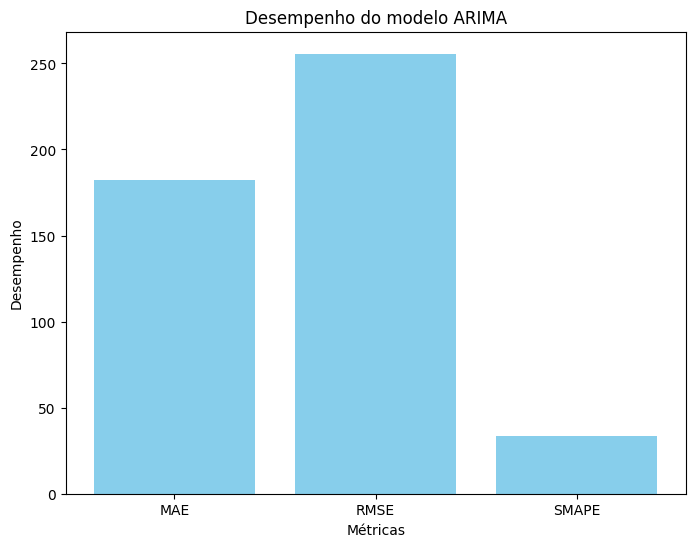

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Carregar a base de dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/Electric_Production%20-%20Electric_Production.csv"
data = pd.read_csv(url)
data['DATE'] = pd.to_datetime(data['DATE'])

# Função para tratar os valores da coluna 'IPG2211A2N'
def clean_value(value):
    try:
        # Remover espaços em branco e converter para ponto flutuante
        cleaned_value = float('.'.join(value.replace(" ", "").split('.')))
        return cleaned_value
    except:
        return np.nan

# Aplicar a função para limpar os valores na coluna 'IPG2211A2N'
data['IPG2211A2N'] = data['IPG2211A2N'].apply(clean_value)

# Remover linhas com valores nulos na coluna 'IPG2211A2N'
data = data.dropna(subset=['IPG2211A2N'])

# Passo 2: Separar a base de dados em treinamento e teste (80% - 20%)
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Inicializar as listas para armazenar métricas
mae_scores, rmse_scores, smape_scores = [], [], []

# Passo 1 e 3: Aplicar cada modelo com validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(train):
    train_fold, test_fold = train.iloc[train_index]['IPG2211A2N'], train.iloc[test_index]['IPG2211A2N']

    # Modelo Simples (Média Móvel)
    simple_model_predictions = np.full_like(test_fold, train_fold.mean())

    # Modelo de Suavização Exponencial (Holt-Winters)
    exp_model = ExponentialSmoothing(train_fold, seasonal='add', seasonal_periods=12).fit()
    exp_predictions = exp_model.forecast(len(test_fold))

    # Modelo ARIMA
    order = (5, 1, 0)
    arima_model = ARIMA(train_fold, order=order).fit()
    arima_predictions = arima_model.forecast(steps=len(test_fold))

    # Calcular as métricas para cada modelo
    mae_scores.append([mean_absolute_error(test_fold, simple_model_predictions),
                       mean_absolute_error(test_fold, exp_predictions),
                       mean_absolute_error(test_fold, arima_predictions)])

    rmse_scores.append([sqrt(mean_squared_error(test_fold, simple_model_predictions)),
                        sqrt(mean_squared_error(test_fold, exp_predictions)),
                        sqrt(mean_squared_error(test_fold, arima_predictions))])

    smape_scores.append([100 * np.mean(2 * np.abs(test_fold - simple_model_predictions) / (np.abs(test_fold) + np.abs(simple_model_predictions))),
                         100 * np.mean(2 * np.abs(test_fold - exp_predictions) / (np.abs(test_fold) + np.abs(exp_predictions))),
                         100 * np.mean(2 * np.abs(test_fold - arima_predictions) / (np.abs(test_fold) + np.abs(arima_predictions)))])

# Calcular médias das métricas para cada modelo
mae_means = np.mean(mae_scores, axis=0)
rmse_means = np.mean(rmse_scores, axis=0)
smape_means = np.mean(smape_scores, axis=0)

# Nomes dos modelos
models = ['Simple Model', 'Exponential Smoothing', 'ARIMA']

# Imprimir métricas médias para cada modelo
for i, model in enumerate(models):
    print(f"{model} - MAE: {mae_means[i]}, RMSE: {rmse_means[i]}, SMAPE: {smape_means[i]}")

# Encontrar o melhor modelo para cada métrica
best_mae_model = models[np.argmin(mae_means)]
best_rmse_model = models[np.argmin(rmse_means)]
best_smape_model = models[np.argmin(smape_means)]

print(f"Melhor modelo para MAE: {best_mae_model}")
print(f"Melhor modelo para RMSE: {best_rmse_model}")
print(f"Melhor modelo para SMAPE: {best_smape_model}")

# Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos
if best_mae_model == best_rmse_model and best_mae_model == best_smape_model:
    best_model_index = models.index(best_mae_model)
    metric_names = ['MAE', 'RMSE', 'SMAPE']
    best_model_performance = [mae_means[best_model_index], rmse_means[best_model_index], smape_means[best_model_index]]

    plt.figure(figsize=(8, 6))
    plt.bar(metric_names, best_model_performance, color='skyblue')
    plt.xlabel('Métricas')
    plt.ylabel('Desempenho')
    plt.title(f'Desempenho do modelo {best_mae_model}')
    plt.show()
else:
    print("Os melhores modelos para cada métrica são diferentes. Não é possível ilustrar o desempenho em um gráfico único.")


Base 2

Simple Model - MAE: 92.73684210526315, RMSE: 99.78219904899137, SMAPE: 39.18998325813574
ARIMA - MAE: 41.474405730717294, RMSE: 51.54933592600088, SMAPE: 16.64260379745319
Melhor modelo para MAE: ARIMA
Melhor modelo para RMSE: ARIMA
Melhor modelo para SMAPE: ARIMA


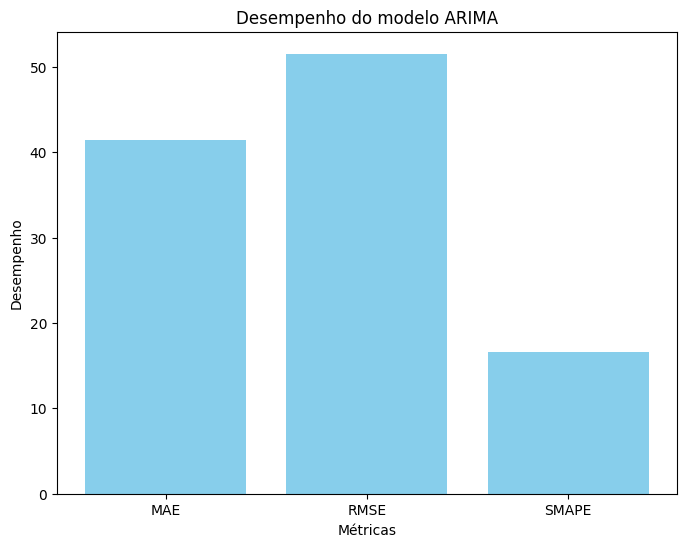

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Carregar a base de dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/airline-passengers%20-%20airline-passengers.csv"
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'])

# Passo 2: Separar a base de dados em treinamento e teste (80% - 20%)
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Inicializar as listas para armazenar métricas
mae_scores, rmse_scores, smape_scores = [], [], []

# Passo 1 e 3: Aplicar cada modelo com validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(train):
    train_fold, test_fold = train.iloc[train_index]['Passengers'], train.iloc[test_index]['Passengers']

    # Modelo Simples (Média Móvel)
    simple_model_predictions = np.full_like(test_fold, train_fold.mean())

    # Modelo ARIMA
    model_arima = auto_arima(train_fold, seasonal=False, stepwise=True, suppress_warnings=True, 
                             error_action="ignore", max_order=None)
    arima_model = ARIMA(train_fold, order=model_arima.order).fit()
    arima_predictions = arima_model.forecast(steps=len(test_fold))

    # Calcular as métricas para cada modelo
    mae_scores.append([mean_absolute_error(test_fold, simple_model_predictions),
                       mean_absolute_error(test_fold, arima_predictions)])

    rmse_scores.append([sqrt(mean_squared_error(test_fold, simple_model_predictions)),
                        sqrt(mean_squared_error(test_fold, arima_predictions))])

    smape_scores.append([100 * np.mean(2 * np.abs(test_fold - simple_model_predictions) / (np.abs(test_fold) + np.abs(simple_model_predictions))),
                         100 * np.mean(2 * np.abs(test_fold - arima_predictions) / (np.abs(test_fold) + np.abs(arima_predictions)))])

# Calcular médias das métricas para cada modelo
mae_means = np.mean(mae_scores, axis=0)
rmse_means = np.mean(rmse_scores, axis=0)
smape_means = np.mean(smape_scores, axis=0)

# Nomes dos modelos
models = ['Simple Model', 'ARIMA']

# Imprimir métricas médias para cada modelo
for i, model in enumerate(models):
    print(f"{model} - MAE: {mae_means[i]}, RMSE: {rmse_means[i]}, SMAPE: {smape_means[i]}")

# Encontrar o melhor modelo para cada métrica
best_mae_model = models[np.argmin(mae_means)]
best_rmse_model = models[np.argmin(rmse_means)]
best_smape_model = models[np.argmin(smape_means)]

print(f"Melhor modelo para MAE: {best_mae_model}")
print(f"Melhor modelo para RMSE: {best_rmse_model}")
print(f"Melhor modelo para SMAPE: {best_smape_model}")

# Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos
if best_mae_model == best_rmse_model and best_mae_model == best_smape_model:
    best_model_index = models.index(best_mae_model)
    metric_names = ['MAE', 'RMSE', 'SMAPE']
    best_model_performance = [mae_means[best_model_index], rmse_means[best_model_index], smape_means[best_model_index]]

    plt.figure(figsize=(8, 6))
    plt.bar(metric_names, best_model_performance, color='skyblue')
    plt.xlabel('Métricas')
    plt.ylabel('Desempenho')
    plt.title(f'Desempenho do modelo {best_mae_model}')
    plt.show()
else:
    print("Os melhores modelos para cada métrica são diferentes. Não é possível ilustrar o desempenho em um gráfico único.")


Base 3

c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimizat

Simple Model - MAE: 60439824.69025652, RMSE: 61984566.78034431, SMAPE: 69.59837476425092
Exponential Smoothing - MAE: 22613075.40303132, RMSE: 25707135.14708001, SMAPE: 26.41258557612759
ARIMA - MAE: 22728843.10470343, RMSE: 25841531.165836874, SMAPE: 26.50536538998542
Melhor modelo para MAE: Exponential Smoothing
Melhor modelo para RMSE: Exponential Smoothing
Melhor modelo para SMAPE: Exponential Smoothing


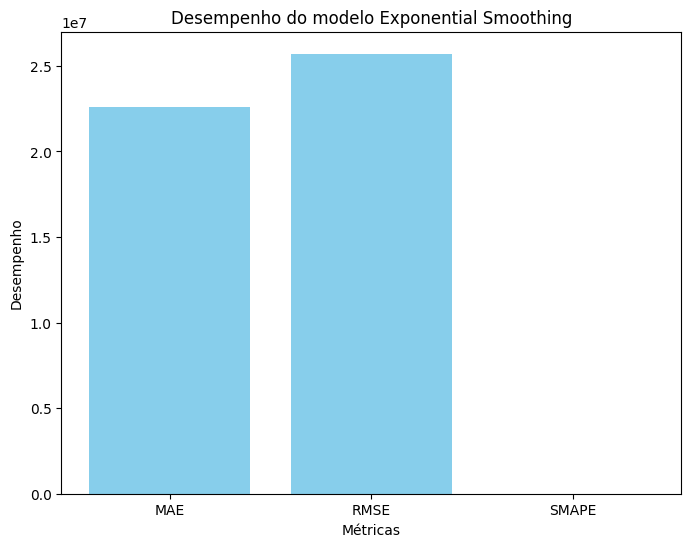

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Carregar a base de dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/facebook-historical-stock-price%20-%20facebook-historical-stock-price.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])

# Limpar a coluna 'Close' para garantir que contenha apenas valores numéricos
data['Close'] = data['Close'].str.replace(',', '').str.replace('.', '').astype(float)

# Passo 2: Separar a base de dados em treinamento e teste (80% - 20%)
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]
# Inicializar as listas para armazenar métricas
mae_scores, rmse_scores, smape_scores = [], [], []

# Passo 1 e 3: Aplicar cada modelo com validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(train):
    train_fold, test_fold = train.iloc[train_index]['Close'], train.iloc[test_index]['Close']

    # Modelo Simples (Média Móvel)
    simple_model_predictions = np.full_like(test_fold, train_fold.mean())

    # Modelo de Suavização Exponencial (Holt-Winters)
    try:
        exp_model = ExponentialSmoothing(train_fold, seasonal='add', seasonal_periods=12).fit()
        exp_predictions = exp_model.forecast(len(test_fold))
    except Exception as e:
        print(f"Erro no modelo de suavização exponencial: {e}")
        exp_predictions = np.full_like(test_fold, np.nan)

    # Modelo ARIMA
    try:
        order = (5, 1, 0)  # Parâmetros ARIMA para exemplo, ajuste conforme necessário
        arima_model = ARIMA(train_fold, order=order).fit()
        arima_predictions = arima_model.forecast(steps=len(test_fold))
    except Exception as e:
        print(f"Erro no modelo ARIMA: {e}")
        arima_predictions = np.full_like(test_fold, np.nan)

    # Calcular as métricas para cada modelo
    mae_scores.append([mean_absolute_error(test_fold, simple_model_predictions),
                       mean_absolute_error(test_fold, exp_predictions),
                       mean_absolute_error(test_fold, arima_predictions)])

    rmse_scores.append([sqrt(mean_squared_error(test_fold, simple_model_predictions)),
                        sqrt(mean_squared_error(test_fold, exp_predictions)),
                        sqrt(mean_squared_error(test_fold, arima_predictions))])

    smape_scores.append([100 * np.mean(2 * np.abs(test_fold - simple_model_predictions) / (np.abs(test_fold) + np.abs(simple_model_predictions))),
                         100 * np.mean(2 * np.abs(test_fold - exp_predictions) / (np.abs(test_fold) + np.abs(exp_predictions))),
                         100 * np.mean(2 * np.abs(test_fold - arima_predictions) / (np.abs(test_fold) + np.abs(arima_predictions)))])

# Calcular médias das métricas para cada modelo
mae_means = np.mean(mae_scores, axis=0)
rmse_means = np.mean(rmse_scores, axis=0)
smape_means = np.mean(smape_scores, axis=0)

# Nomes dos modelos
models = ['Simple Model', 'Exponential Smoothing', 'ARIMA']

# Imprimir métricas médias para cada modelo
for i, model in enumerate(models):
    print(f"{model} - MAE: {mae_means[i]}, RMSE: {rmse_means[i]}, SMAPE: {smape_means[i]}")

# Encontrar o melhor modelo para cada métrica
best_mae_model = models[np.argmin(mae_means)]
best_rmse_model = models[np.argmin(rmse_means)]
best_smape_model = models[np.argmin(smape_means)]

print(f"Melhor modelo para MAE: {best_mae_model}")
print(f"Melhor modelo para RMSE: {best_rmse_model}")
print(f"Melhor modelo para SMAPE: {best_smape_model}")

# Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos
if best_mae_model == best_rmse_model and best_mae_model == best_smape_model:
    best_model_index = models.index(best_mae_model)
    metric_names = ['MAE', 'RMSE', 'SMAPE']
    best_model_performance = [mae_means[best_model_index], rmse_means[best_model_index], smape_means[best_model_index]]

    plt.figure(figsize=(8, 6))
    plt.bar(metric_names, best_model_performance, color='skyblue')
    plt.xlabel('Métricas')
    plt.ylabel('Desempenho')
    plt.title(f'Desempenho do modelo {best_mae_model}')
    plt.show()
else:
    print("Os melhores modelos para cada métrica são diferentes. Não é possível ilustrar o desempenho em um gráfico único.")



Base 4


Simple Model - MAE: 274.25892857142856, RMSE: 292.8723843159303, SMAPE: 68.27555753559818
Exponential Smoothing - MAE: 140.31110345859256, RMSE: 174.55826179015565, SMAPE: 28.746378977600312
ARIMA - MAE: 136.58724466539212, RMSE: 176.15509557792856, SMAPE: 27.850987379253528
Melhor modelo para MAE: ARIMA
Melhor modelo para RMSE: Exponential Smoothing
Melhor modelo para SMAPE: ARIMA


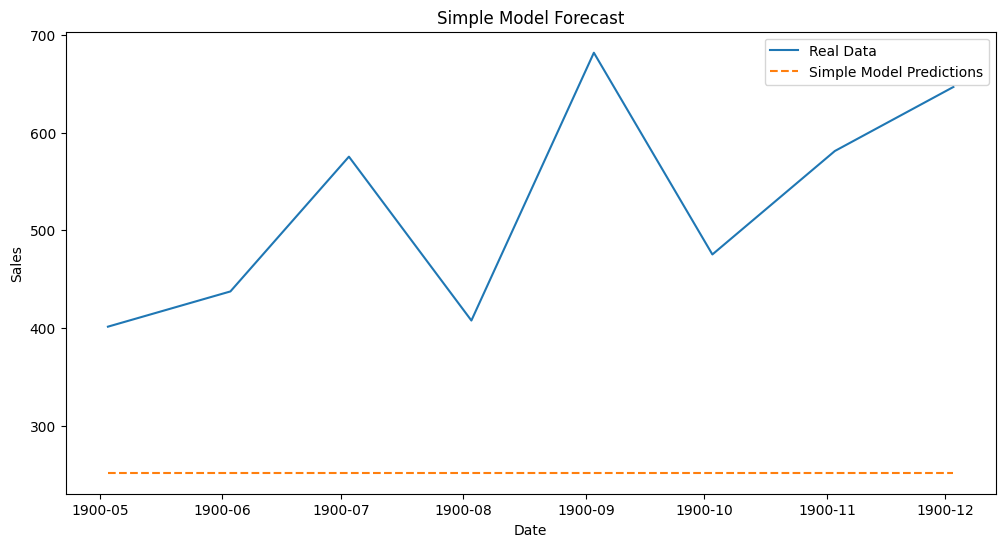

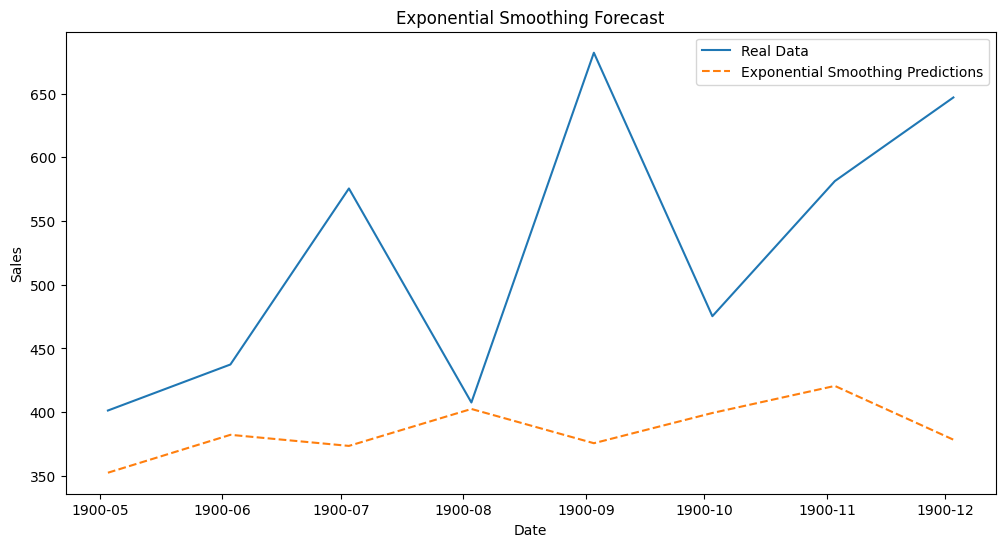

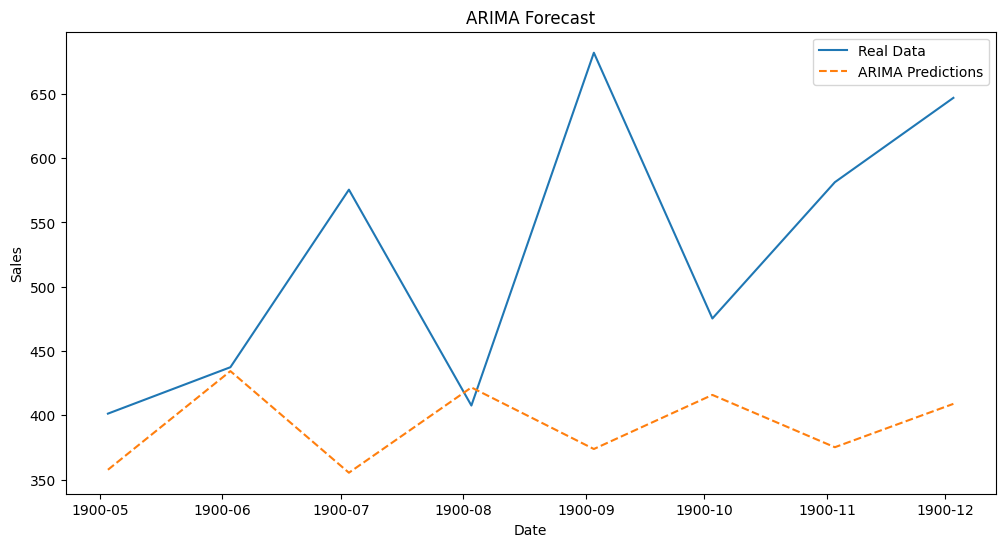

In [45]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# URL do arquivo CSV
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/shampoo_sales%20-%20shampoo_sales.csv"

# Passo 1: Carregar os dados
data = pd.read_csv(url)

# Corrigir o formato da coluna 'Month'
data['Month'] = pd.to_datetime(data['Month'], errors='coerce', format='%d-%m')

# Remover linhas com valores de data inválidos (NaT representa valores de data inválidos)
data = data.dropna(subset=['Month'])

# Passo 2: Separar a base de dados em treinamento e teste (80% - 20%)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]
# Passo 3: Aplicar os métodos de previsão aos dados usando validação cruzada
# Modelo Simples
simple_model_predictions = np.full_like(test_data['Sales'], train_data['Sales'].mean())

# Modelo de Suavização Exponencial (Holt-Winters)
exp_model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=12).fit()
exp_predictions = exp_model.forecast(len(test_data))

# Modelo ARIMA
arima_model = ARIMA(train_data['Sales'], order=(5,1,0)).fit()
arima_predictions = arima_model.forecast(steps=len(test_data))

# Passo 4: Medir o desempenho de cada modelo usando MAE, RMSE e SMAPE
def calculate_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = sqrt(mean_squared_error(true, predicted))
    smape = 100 * np.mean(2 * np.abs(predicted - true) / (np.abs(true) + np.abs(predicted)))
    return mae, rmse, smape

mae_simple, rmse_simple, smape_simple = calculate_metrics(test_data['Sales'], simple_model_predictions)
mae_exp, rmse_exp, smape_exp = calculate_metrics(test_data['Sales'], exp_predictions)
mae_arima, rmse_arima, smape_arima = calculate_metrics(test_data['Sales'], arima_predictions)

# Passo 5: Imprimir as métricas de desempenho
print("Simple Model - MAE: {}, RMSE: {}, SMAPE: {}".format(mae_simple, rmse_simple, smape_simple))
print("Exponential Smoothing - MAE: {}, RMSE: {}, SMAPE: {}".format(mae_exp, rmse_exp, smape_exp))
print("ARIMA - MAE: {}, RMSE: {}, SMAPE: {}".format(mae_arima, rmse_arima, smape_arima))

# Identificar o melhor modelo para cada métrica
best_model_mae = "Simple Model" if mae_simple < mae_exp and mae_simple < mae_arima else "Exponential Smoothing" if mae_exp < mae_arima else "ARIMA"
best_model_rmse = "Simple Model" if rmse_simple < rmse_exp and rmse_simple < rmse_arima else "Exponential Smoothing" if rmse_exp < rmse_arima else "ARIMA"
best_model_smape = "Simple Model" if smape_simple < smape_exp and smape_simple < smape_arima else "Exponential Smoothing" if smape_exp < smape_arima else "ARIMA"

print("Melhor modelo para MAE: {}".format(best_model_mae))
print("Melhor modelo para RMSE: {}".format(best_model_rmse))
print("Melhor modelo para SMAPE: {}".format(best_model_smape))

# Gráfico para o modelo simples
plt.figure(figsize=(12, 6))
plt.plot(test_data['Month'], test_data['Sales'], label='Real Data')
plt.plot(test_data['Month'], simple_model_predictions, label='Simple Model Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Simple Model Forecast')
plt.legend()
plt.show()

# Gráfico para o modelo de Suavização Exponencial (Holt-Winters)
plt.figure(figsize=(12, 6))
plt.plot(test_data['Month'], test_data['Sales'], label='Real Data')
plt.plot(test_data['Month'], exp_predictions, label='Exponential Smoothing Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

# Gráfico para o modelo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test_data['Month'], test_data['Sales'], label='Real Data')
plt.plot(test_data['Month'], arima_predictions, label='ARIMA Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()